In [1]:
import requests
from bs4 import BeautifulSoup

In [24]:
url = "https://www.cervantesvirtual.com/obra-visor/el-principe--1/html/0005364a-82b2-11df-acc7-002185ce6064_88.html"
contenido = requests.get(url).text

In [25]:
print(contenido)


<!DOCTYPE html>
<html lang="es">
<!-- .15 -->
<head profile="http://a9.com/-/spec/opensearch/1.1/">

    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>El Príncipe / Nicolás Maquiavelo | Biblioteca Virtual Miguel de Cervantes</title>	
                
        
                         
        <meta name="keywords" content="cervantes virtual, biblioteca cervantes, biblioteca virtual cervantes, biblioteca, biblioteca digital, virtual, Cervantes, literatura, lenguas hispanas, obras clásicas, educación, investigación, ediciones, tesis, español, catalán, ciencia, historia" />
        <meta name="author" content="Biblioteca Virtual Miguel de Cervantes" />

        <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="Buscador en catálogo de www.cervantesvirtual.com" />

                
        
                
    
	<meta name="twitter:card" 

In [26]:
soup = BeautifulSoup(contenido, "html.parser")

In [27]:
parrafos = soup.find_all("p")

In [28]:
print(parrafos)

[<p align="center">Niccolò Machiavelli</p>, <p style="text-align: center;"><img alt="Portada" border="2" src="/s3/BVMC_OBRAS/000/536/4a8/2b2/11d/fac/c70/021/85c/e60/64/mimes/imagenes/0005364a-82b2-11df-acc7-002185ce6064_1.jpg"/></p>, <p style="text-align: justify;text-indent:30px;">Los que quieren
lograr la gracia de un príncipe tienen la costumbre de
presentarle las cosas que se reputan como que le son más
agradables, o en cuya posesión se sabe que él se
complace más. Le ofrecen en su consecuencia: los unos,
caballos; los otros, armas; cuáles, telas de oro; varios,
piedras preciosas u otros objetos igualmente dignos de su
grandeza.</p>, <p style="text-align: justify;text-indent:30px;">Queriendo
presentar yo mismo a Vuestra Magnificencia alguna ofrenda que
pudiera probarle todo mi rendimiento para con ella, no he hallado,
entre las cosas que poseo, ninguna que me sea más querida, y
de que haga yo más caso, que mi conocimiento de la conducta
de los mayores estadistas que han existido. N

In [29]:
h1 = soup.find_all("h1")

In [30]:
print(h1)

[<h1 class="sr-only">Visor de obras.</h1>, <h1 class="tit">El príncipe</h1>]


In [31]:
italicas = soup.find_all("i")

In [32]:
print(italicas) #No contiene italicas

[]


In [33]:
from collections import Counter

In [34]:
parrafos = str(soup.find_all("p"))

In [36]:
print(parrafos.count("príncipe"))

83


In [38]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [40]:
buscar_palabra("estado")
buscar_palabra("pueblo")
buscar_palabra("leyes")
buscar_palabra("poder")

Encontraste la palabra 'estado' 67 veces
Encontraste la palabra 'pueblo' 39 veces
Encontraste la palabra 'leyes' 8 veces
Encontraste la palabra 'poder' 37 veces


## Algo divertido

In [41]:
import random

In [42]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [43]:
print("\nLee un pasaje aleatorio de El principe")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de El principe
-------------------------------------------
Si, para hacer
perder Milán al rey de Francia la primera vez, no hubiera
sido menester más que la terrible llegada del Duque Ludovico
hacia los confines del Milanesado, fue necesario para
hacérsele perder la segunda que se armasen todos contra
él, y que sus ejércitos fuesen arrojados de Italia, o
destruidos14.
-------------------------------------------
Este párrafo tiene 52 palabras.


## Visualizaciones interesantes


In [44]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [45]:
import matplotlib.pyplot as plt

In [46]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

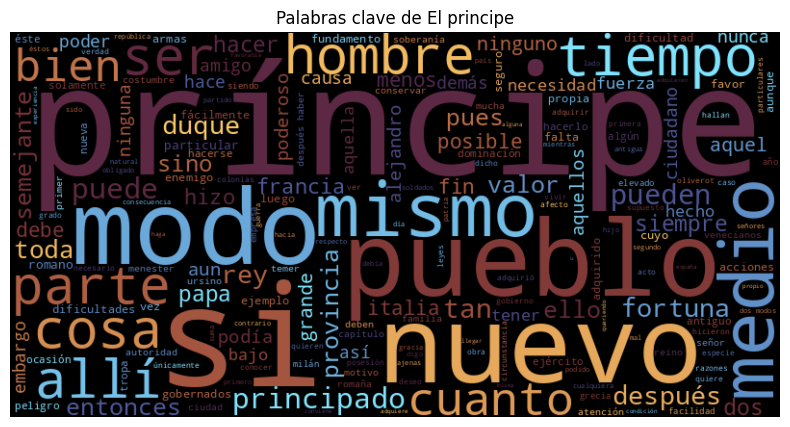

In [66]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='cyan', colormap='managua').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de El principe')
plt.show()

In [71]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'si', 'bien', 'allí', 'modo', 'ello',
        'cosa', 'aun', 'vez', 'aquel', 'cuanto'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

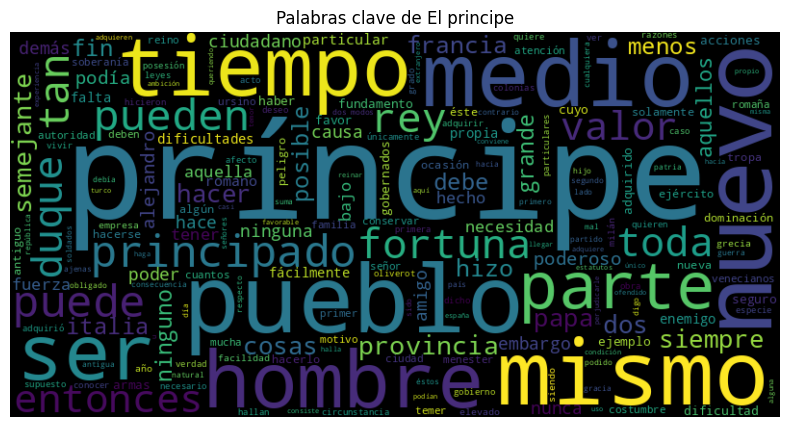

In [72]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de El principe')
plt.show()